В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі три лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
medical_df = pd.read_csv('/content/drive/MyDrive/Data Science/medical-charges.csv') # замініть на ваш шлях до файлу
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
X = non_smoker_df['age'].values
y = non_smoker_df['charges'].values


In [ ]:
def normal_equations(X,y):
    """Computes the closed-form solution to linear regression"""
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

In [ ]:
X_with_intercept = np.c_[np.ones((X.shape[0], 1)), X]
X[:3], X_with_intercept[:3]

(array([18, 28, 33]),
 array([[ 1., 18.],
        [ 1., 28.],
        [ 1., 33.]]))

In [ ]:
MNK_coefs = normal_equations(X_with_intercept, y)

In [ ]:
predictions_MNK = np.dot(X_with_intercept, MNK_coefs)

In [ ]:
predictions_MNK

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

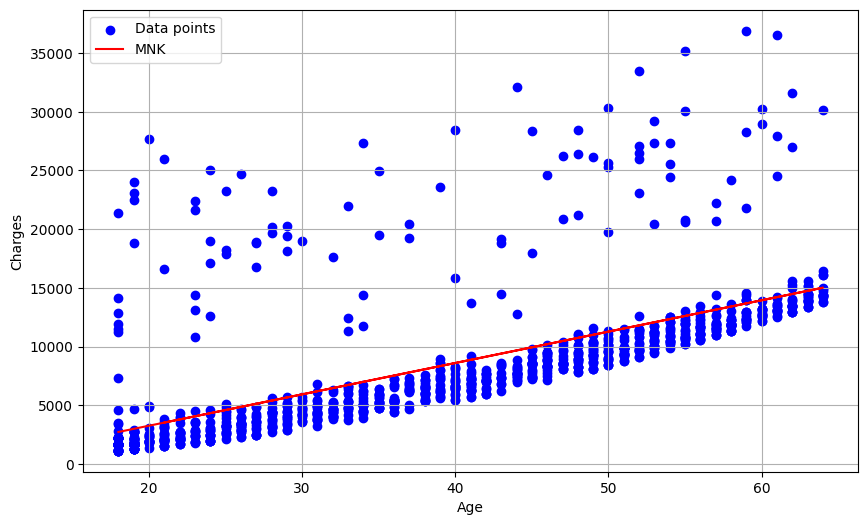

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, predictions_MNK, color='red', label='MNK')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
rmse = mean_squared_error(y, predictions_MNK, squared=False)
rmse

4662.505766636395

In [ ]:
X = non_smoker_df['age'].values.reshape(-1, 1)
y = non_smoker_df['charges'].values


In [ ]:
def full_batch_gradient_descent(X, y, lr=0.000001, epochs=1000):
    m, b = 0.0, 0.0  # Початкові параметри
    n = len(y)
    errors = []
    for _ in range(epochs):
        y_pred = m * X[:, 0] + b
        error = y_pred - y
        errors.append(sum(error**2))
        m_gradient = (2/n) * np.dot(error, X[:, 0])
        b_gradient = (2/n) * np.sum(error)
        m = m - lr * m_gradient
        b = b - lr * b_gradient
    return m, b, errors

m, b, errors = full_batch_gradient_descent(X, y, lr=0.000001, epochs=1000)
predictions_fbgd1 = m * X[:, 0] + b

m, b


(213.4575690658104, 4.33124916239435)

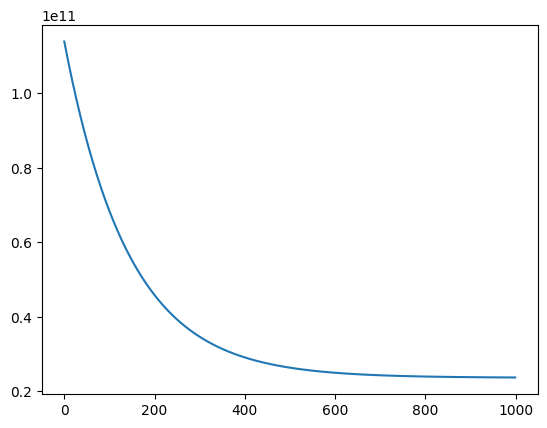

In [ ]:
plt.plot(errors);

In [ ]:
m, b, errors = full_batch_gradient_descent(X, y, lr=0.001, epochs=100)
predictions_fbgd2 = m * X[:, 0] + b

m, b

(-1.3967624262082842e+42, -3.1448925830775484e+40)

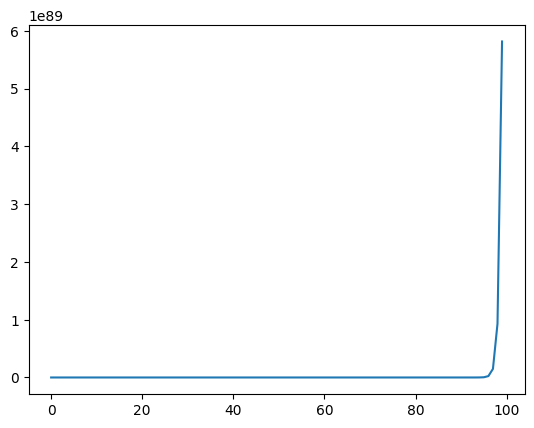

In [ ]:
plt.plot(errors);


In [ ]:
m, b, errors = full_batch_gradient_descent(X, y, lr=0.00001, epochs=1000)
predictions_fbgd3 = m * X[:, 0] + b

m, b

(220.15455551129122, 0.21300652799863293)

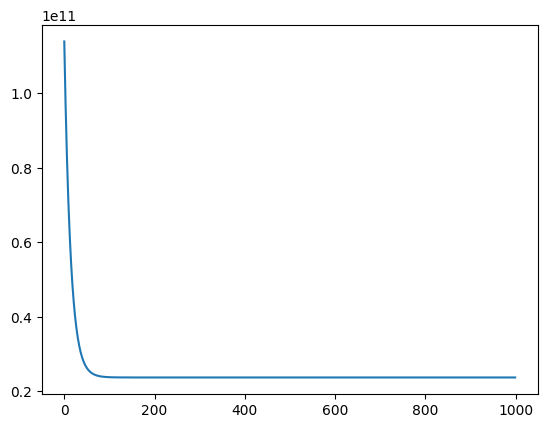

In [ ]:
plt.plot(errors);
#Графік цих помилок мені здається найбільш підходяшим
#тому навчальний рівень 0.00001 та кількість епох 1000 буду використовувати як найкращий варіант градієнтного спуску

In [ ]:
from sklearn.linear_model import LinearRegression

# Модель лінійної регресії засобами Scikit-learn (МНК)
lin_reg = LinearRegression()

In [ ]:
lin_reg.fit(X, y)

LinearRegression()

In [ ]:
lin_reg.coef_, lin_reg.intercept_

(array([267.24891283]), -2091.4205565650864)

In [ ]:
predictions_sklearn = lin_reg.predict(X)

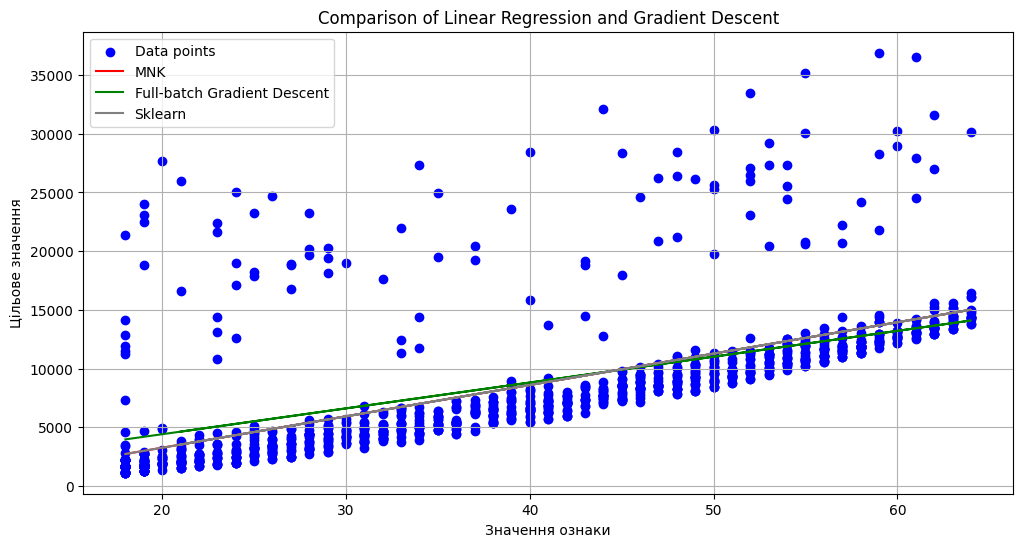

In [ ]:
# Візуалізація результатів
plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], y, color='blue', label='Data points')
plt.plot(X[:, 0], predictions_MNK, color='red', label='MNK')
plt.plot(X[:, 0], predictions_fbgd3, color='green', label='Full-batch Gradient Descent')
plt.plot(X[:, 0], predictions_sklearn, color='grey', label='Sklearn')
plt.title('Comparison of Linear Regression and Gradient Descent')
plt.xlabel('Значення ознаки')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print('Коефіцієнти з МНК: ', MNK_coefs)
print('Коефіцієнти з стохаст. град. спуску: ', b, m)
print('Коефіцієнти з sklearn: ', lin_reg.intercept_, lin_reg.coef_)

Коефіцієнти з МНК:  [-2091.42055657   267.24891283]
Коефіцієнти з стохаст. град. спуску:  0.21300652799863293 220.15455551129122
Коефіцієнти з sklearn:  -2091.4205565650864 [267.24891283]


In [ ]:
print('RMSE МНК: ', rmse)

rmse_fbg = mean_squared_error(y, predictions_fbgd3, squared=False)
print('RMSE  град. спуску: ', rmse_fbg)

rmse_sklearn = mean_squared_error(y, predictions_sklearn, squared=False)
print('RMSE sklearn: ', rmse_sklearn)

RMSE МНК:  4662.505766636395
RMSE  град. спуску:  4715.349750127827
RMSE sklearn:  4662.505766636395


**Висновок**: графіки моделей майже однакові, також майже однаковими вийшли показники RMSE

 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

In [ ]:
smoker_df = medical_df[medical_df.smoker == 'yes']

In [140]:
X = smoker_df['age'].values.reshape(-1,1)
y = smoker_df['charges'].values

In [141]:
lin_reg = LinearRegression()

In [142]:
lin_reg.fit(X, y)

LinearRegression()

In [143]:
lin_reg.coef_, lin_reg.intercept_

(array([305.23760211]), 20294.128126915966)

In [144]:
predictions_sklearn = lin_reg.predict(X)

In [145]:
rmse_sklearn = mean_squared_error(y, predictions_sklearn, squared=False)
print('RMSE sklearn: ', rmse_sklearn)

RMSE sklearn:  10711.00334810241


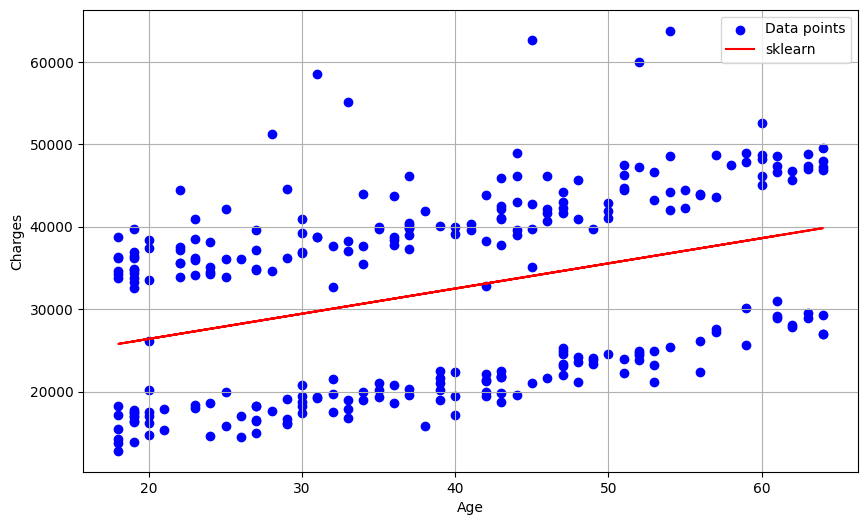

In [147]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, predictions_sklearn, color='red', label='sklearn')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.grid(True)
plt.show()

**Висновок:** з графіку та результату RMSE видно що модель не зовсім гарно підходить для  цих даних, оскільки помилка достатньо велика. Я б не використовувала дану модель для прогнозування медичних зборів у курців базуючись на їх віці.